<a href="https://colab.research.google.com/github/mennatulah176/Machine-learning-model/blob/main/ML%20mode-Telco-Customer-Churn%20on%20kagglel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Load the dataset (replace the path with your actual file path)
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')


In [ ]:
# Display column names
print("Column Names:")
print(df.columns.tolist())
# Display number of rows and columns
print("\nShape of Dataset (Rows, Columns):")
print(df.shape)
# Display first 10 rows
print("\nFirst 10 Rows:")
print(df.head(10))
# Display last 10 rows
print("\nLast 10 Rows:")
print(df.tail(10))



Column Names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Shape of Dataset (Rows, Columns):
(7043, 21)

First 10 Rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0    

In [ ]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("🔹 Basic Statistics:")
print(df.describe())
#Identify Missing Values
print("\n🔹 Missing Values in Each Column:")
print(df.isnull().sum())
#Check for Imbalanced Data in Churn Column
print("\n🔹 Churn Class Distribution:")
print(df['Churn'].value_counts())

print("\n🔹 Churn Percentage Distribution:")
print(df['Churn'].value_counts(normalize=True) * 100)


🔹 Basic Statistics:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

🔹 Missing Values in Each Column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
Pa

Data preprocessing :

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN  # Use SMOTEENN
# Drop missing values in TotalCharges
df = df.dropna(subset=['TotalCharges'])
# Drop customerID column
df = df.drop('customerID', axis=1)
# Convert target to binary
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
# One-hot encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
# Standardize numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']
# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X, y)  #  using SMOTEENN


In [ ]:
# Split the resampled data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,             # Use the resampled feature matrix and target vector (after SMOTEENN)
    test_size=0.2,            # Allocate 20% of the data for testing, 80% for training
    stratify=y_res,           # Preserve the class distribution of the target variable in both sets
    random_state=42           # Set random seed for reproducibility
)

# Print the shapes of the resulting training and testing sets
print('🔹 Training set:', X_train.shape, y_train.shape)  # Shape of features and labels in training set
print('🔹 Testing set :', X_test.shape, y_test.shape)    # Shape of features and labels in testing set


🔹 Training set: (5242, 30) (5242,)
🔹 Testing set : (1311, 30) (1311,)


Choose and implement a classification algorithm
Model Choice: Random Forest Classifier Why Random Forest?
-	It handles both categorical and numerical data easily.
-	It is robust to overfitting (because it averages many trees).
-	It automatically deals with feature importance.
-	It performs very well with minimal hyperparameter tuning.
Alternative: XGBoost could be even more powerful, but Random Forest is simpler and very strong


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)

In [ ]:
# Predict on test data
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]


Using the following metrics:

Accuracy

Precision

Recall

F1-score

AUC-ROC

Explaining which metrics are most important for imbalanced datasets like this :


🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       564
           1       0.96      0.97      0.97       747

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311

🔹 Confusion Matrix:

[[534  30]
 [ 21 726]]

🔹 AUC-ROC Score: 0.9929


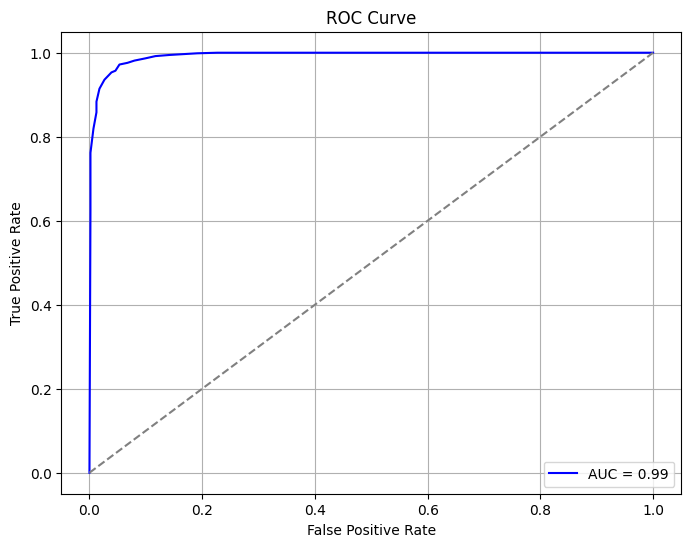

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Classification report
print("🔹 Classification Report:\n")
print(classification_report(y_test, y_pred))
# Confusion matrix
print("🔹 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
# AUC-ROC score
y_proba = rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"\n🔹 AUC-ROC Score: {auc:.4f}")
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


By doing fine tuning to the model :

Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔹 Best Parameters:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': False}

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       564
           1       0.97      0.98      0.97       747

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311

🔹 Confusion Matrix:
[[539  25]
 [ 15 732]]
🔹 AUC-ROC Score: 0.9962


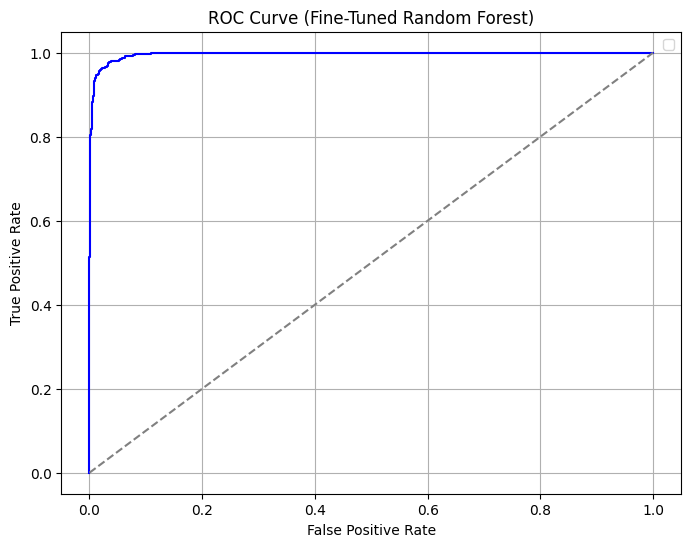

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import numpy as np
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
# Randomized search
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Fit on training data
random_search.fit(X_train, y_train)
# Best model from search
rf_model = random_search.best_estimator_
# Predict
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]
# Evaluation
print("🔹 Best Parameters:")
print(random_search.best_params_)
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))
print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print(f"🔹 AUC-ROC Score: {auc:.4f}")
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Fine-Tuned Random Forest)")
plt.legend()
plt.grid(True)
plt.show()


Code for checking over fitting using graph :

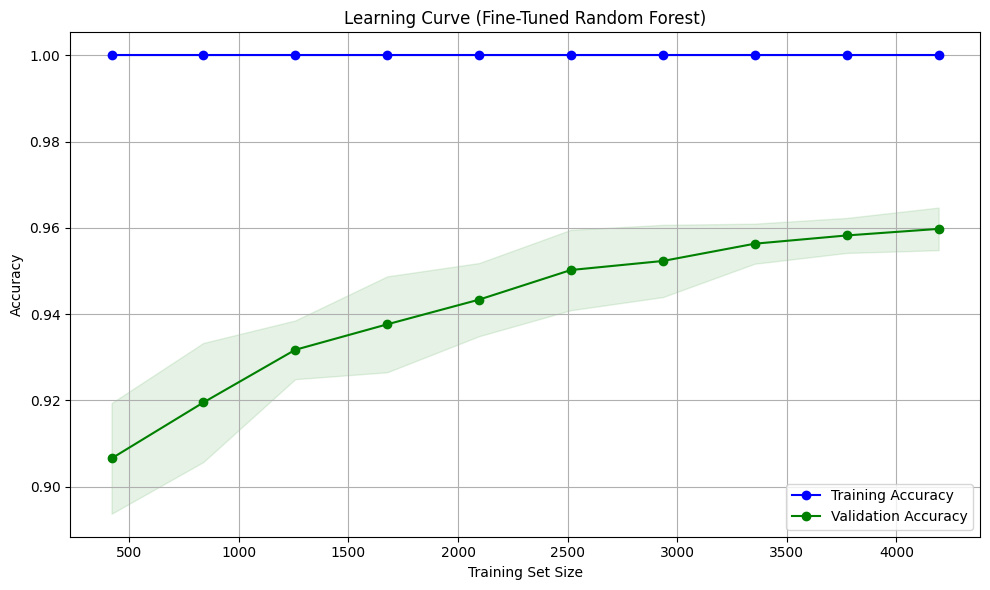

In [ ]:
from sklearn.model_selection import learning_curve
# Use the best model obtained from RandomizedSearchCV
model = rf_model
# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42,
    n_jobs=-1
)
# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
plt.title('Learning Curve (Fine-Tuned Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


- Another code to check over fitting by numbers :

🔹 Training Accuracy: 1.0000
🔹 Training AUC-ROC Score: 1.0000

🔹 Testing Accuracy: 0.9695
🔹 Testing AUC-ROC Score: 0.9962

🔹 Conclusion:
✅ No overfitting detected.


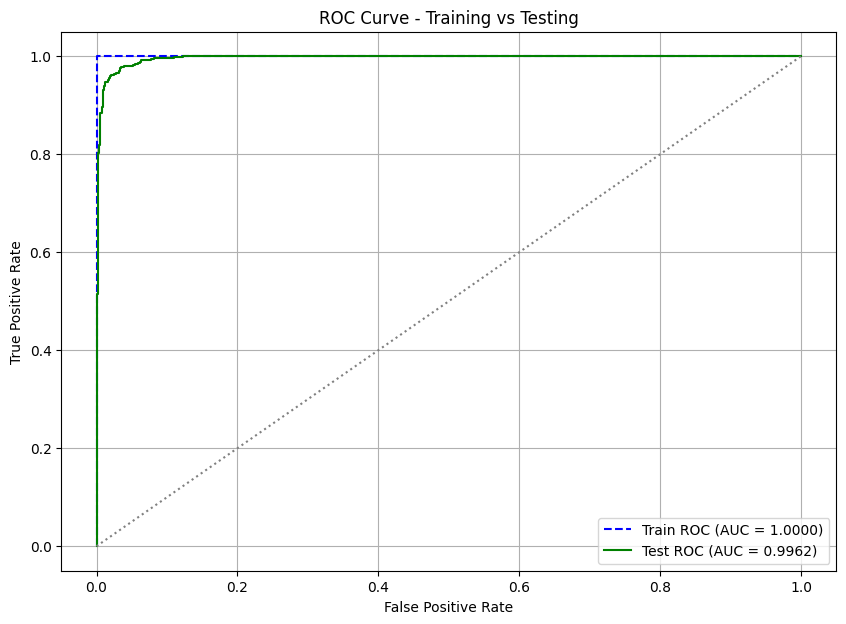

In [ ]:
# 1. Predictions on Training Set (for overfitting check)
# Predict on training data
y_pred_train = rf_model.predict(X_train)
y_proba_train = rf_model.predict_proba(X_train)[:, 1]
# Evaluate on training data
train_accuracy = accuracy_score(y_train, y_pred_train)
train_auc = roc_auc_score(y_train, y_proba_train)
print("🔹 Training Accuracy:", f"{train_accuracy:.4f}")
print("🔹 Training AUC-ROC Score:", f"{train_auc:.4f}")
# 2. Predictions on Test Set (for overfitting checking)
# Predict on test data
y_pred_test = rf_model.predict(X_test)
y_proba_test = rf_model.predict_proba(X_test)[:, 1]
# Evaluate on test data
test_accuracy = accuracy_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_proba_test)
print("\n🔹 Testing Accuracy:", f"{test_accuracy:.4f}")
print("🔹 Testing AUC-ROC Score:", f"{test_auc:.4f}")
# 3. Overfitting Detection Conclusion
print("\n🔹 Conclusion:")
if (train_accuracy - test_accuracy) > 0.05:
    print("⚠️ Potential Overfitting: Training accuracy much higher than Testing accuracy.")
else:
    print("✅ No overfitting detected.")
# 4. ROC Curve Plot
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
plt.figure(figsize=(10, 7))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {train_auc:.4f})', color='blue', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {test_auc:.4f})', color='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')
plt.title('ROC Curve - Training vs Testing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


 - Then from the previous we found that the accuracy reach to 97% with no any overfitting

- Comparison of the results of the original model and the fine-tuned model :

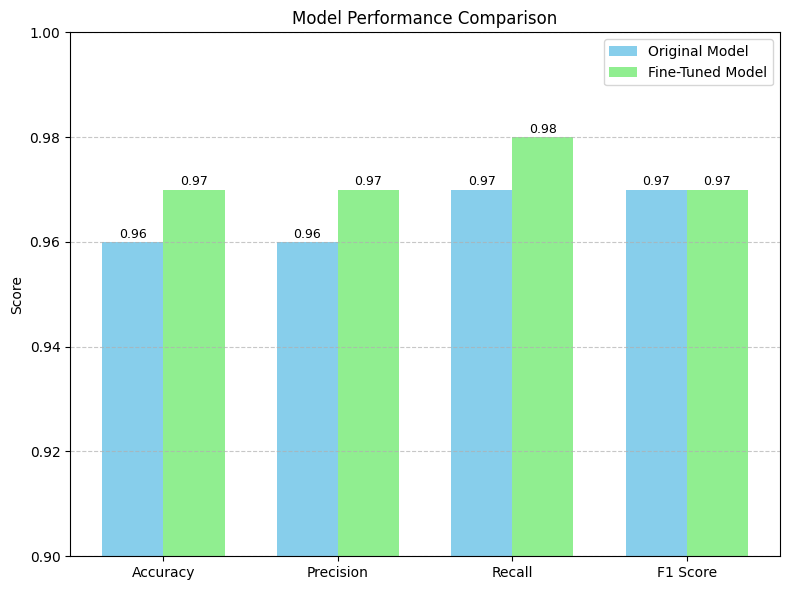

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Metrics from the classification reports
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
# Values before and after fine-tuning
original = [0.96, 0.96, 0.97, 0.97]
tuned = [0.97, 0.97, 0.98, 0.97]
# Bar chart setup
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, original, width, label='Original Model', color='skyblue')
bars2 = ax.bar(x + width/2, tuned, width, label='Fine-Tuned Model', color='lightgreen')
# Add labels and title
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.9, 1.0)  # Focus on high performance range
ax.legend()
# Add values above bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
